In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from salishsea_tools import geo_tools, nc_tools, tidetools, viz_tools
import xarray as xr
import datetime
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

%matplotlib inline

In [21]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import pickle

In [3]:
bounds = pickle.load(open('bounds.pkl', 'rb'))

In [4]:
def make_plot(n):
    fig, ax = plt.subplots(figsize = (10,10))
    c, xedge, yedge, im = ax.hist2d(list_of_ferry_chl[(bounds[n]<=list_of_lons) 
                                                       &  (list_of_lons< bounds[n+1])], 
                                    list_of_model_chl[(bounds[n]<=list_of_lons) 
                                                       &  (list_of_lons< bounds[n+1])], 
                                    bins = 100, norm=LogNorm())
    fig.colorbar(im, ax=ax)
    ax.set_xlabel('Log Ferry Data')
    ax.set_ylabel('Log Nowcast-green')
    ax.plot(np.arange(0,35), 'r-')
    ax.set_title(str(bounds[n]) + ' < lon < ' + str(bounds[n+1]))
    print('bias =  ' + str(-np.mean(list_of_ferry_chl[(bounds[n]<=list_of_lons) 
                                                       & (list_of_lons< bounds[n+1])]) + 
                           np.mean(list_of_model_chl[(bounds[n]<=list_of_lons) 
                                                      & (list_of_lons< bounds[n+1])])))
    print('RMSE = ' + str(np.sqrt(np.sum((list_of_model_chl[(bounds[n]<=list_of_lons) 
                                                             &  (list_of_lons< bounds[n+1])] - 
                                          list_of_ferry_chl[(bounds[n]<=list_of_lons) 
                                                             & (list_of_lons< bounds[n+1])])**2) 
                                  / len(list_of_model_chl[(bounds[n]<=list_of_lons) 
                                                           &  (list_of_lons< bounds[n+1])]))))
    xbar = np.mean(list_of_ferry_chl[(bounds[n]<=list_of_lons) &  (list_of_lons< bounds[n+1])])
    print('Willmott = ' + str(1-(np.sum((list_of_model_chl[(bounds[n]<=list_of_lons) 
                                                            & (list_of_lons< bounds[n+1])] - 
                                         list_of_ferry_chl[(bounds[n]<=list_of_lons) 
                                                            &  (list_of_lons< bounds[n+1])])**2)  / 
                                 np.sum((np.abs(list_of_model_chl[(bounds[n]<=list_of_lons) 
                                                                   &  (list_of_lons< bounds[n+1])] 
                                                - xbar) 
                                         + np.abs(list_of_ferry_chl[(bounds[n]<=list_of_lons) 
                                                                     &  (list_of_lons< bounds[n+1])] 
                                                  - xbar))**2))))

In [12]:
list_of_model_chl = pickle.load(open('model_chl.pkl', 'rb'))
list_of_ferry_chl = pickle.load(open('ferry_chl.pkl', 'rb'))
list_of_lons = pickle.load(open('chl_lons.pkl', 'rb'))

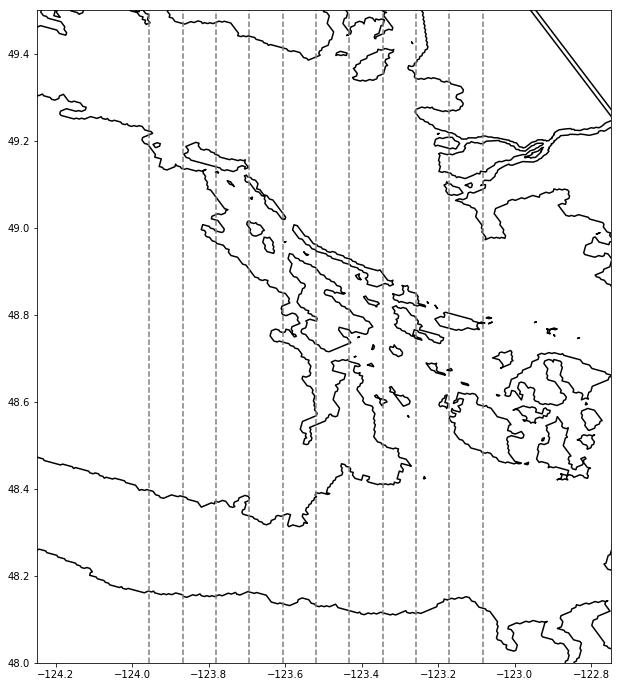

In [50]:
fig, ax = plt.subplots(figsize = (12,12))
viz_tools.plot_coastline(ax, grid, coords = 'map')
viz_tools.set_aspect(ax, coords = 'map')
ax.set_xlim(-124.25, -122.75)
ax.set_ylim(48, 49.5)
for p in range(11):
    ax.plot((bounds[p], bounds[p]), (48, 49.5), '--', color = 'grey')

In [6]:
from matplotlib.colors import LogNorm

In [13]:
list_of_model_chl = np.log10(list_of_model_chl[list_of_ferry_chl < 25])
list_of_lons = list_of_lons[list_of_ferry_chl < 25]
list_of_ferry_chl = np.log10(list_of_ferry_chl[list_of_ferry_chl < 25])

/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


bias =  0.12922758492
RMSE = 0.4041174148
Willmott = 0.616661915088


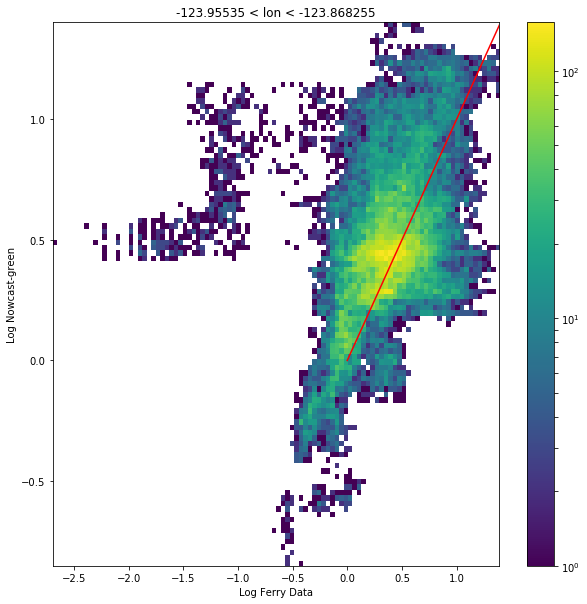

In [14]:
make_plot(0)

bias =  0.144309520828
RMSE = 0.396177350637
Willmott = 0.650595443438


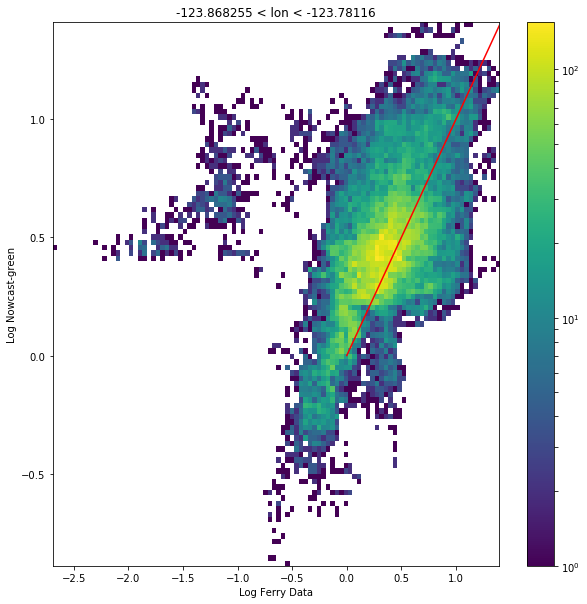

In [15]:
make_plot(1)

bias =  0.159185898286
RMSE = 0.401454438006
Willmott = 0.6540904575


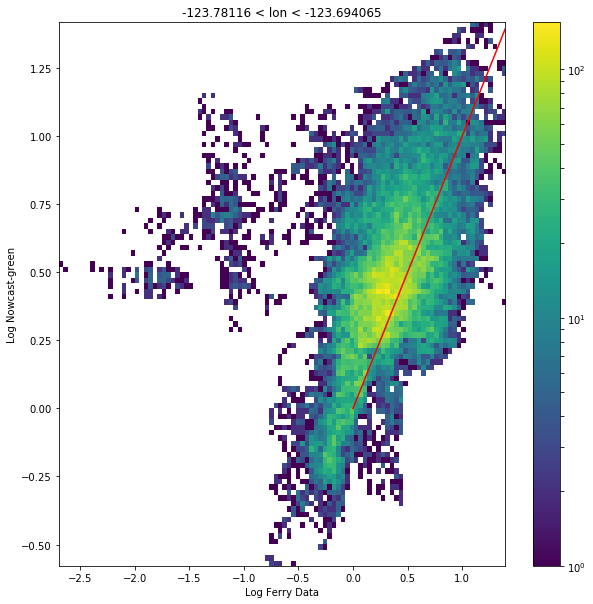

In [16]:
make_plot(2)

bias =  0.160882297418
RMSE = 0.40489421275
Willmott = 0.640065668505


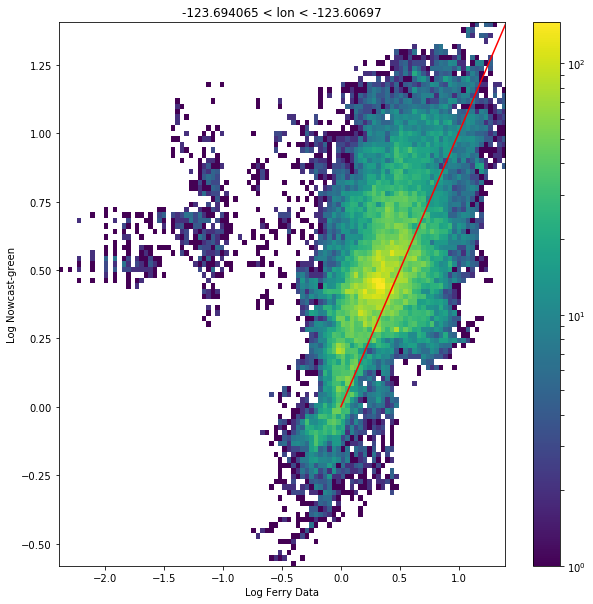

In [17]:
make_plot(3)

bias =  0.191907067409
RMSE = 0.424249709253
Willmott = 0.616104589368


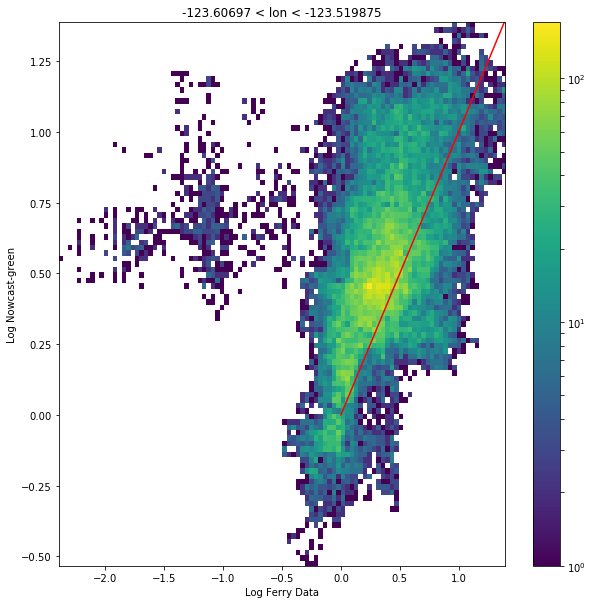

In [18]:
make_plot(4)

bias =  0.244643800407
RMSE = 0.453856851787
Willmott = 0.590344294382


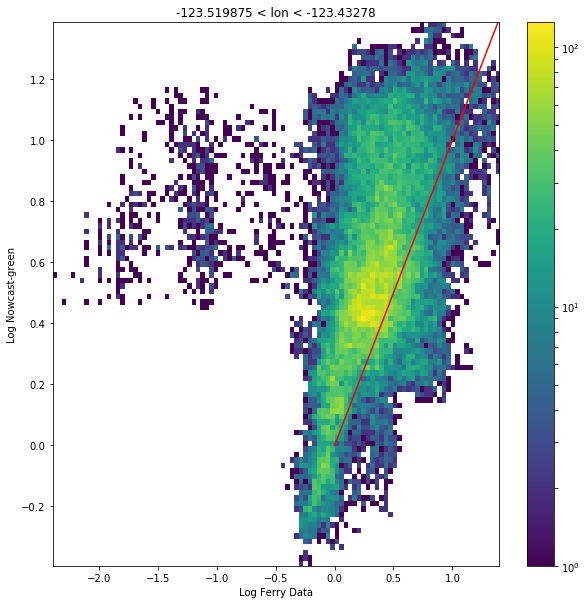

In [19]:
make_plot(5)

bias =  0.334387579224
RMSE = 0.521797598472
Willmott = 0.541351683755


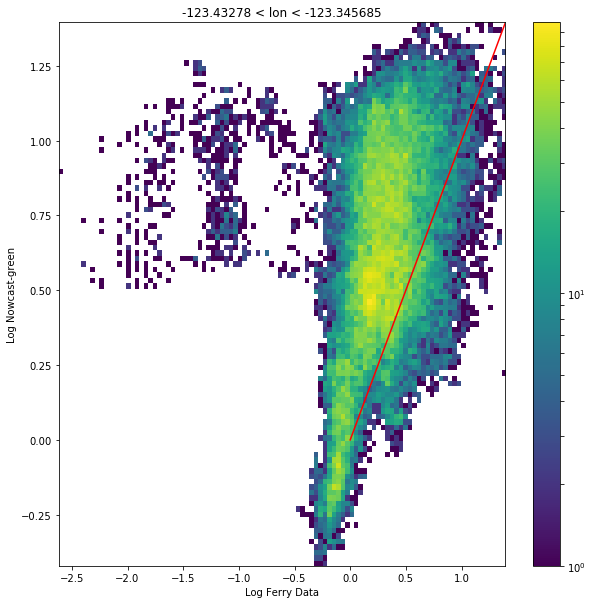

In [20]:
make_plot(6)

bias =  0.414444154527
RMSE = 0.597675407956
Willmott = 0.528863342517


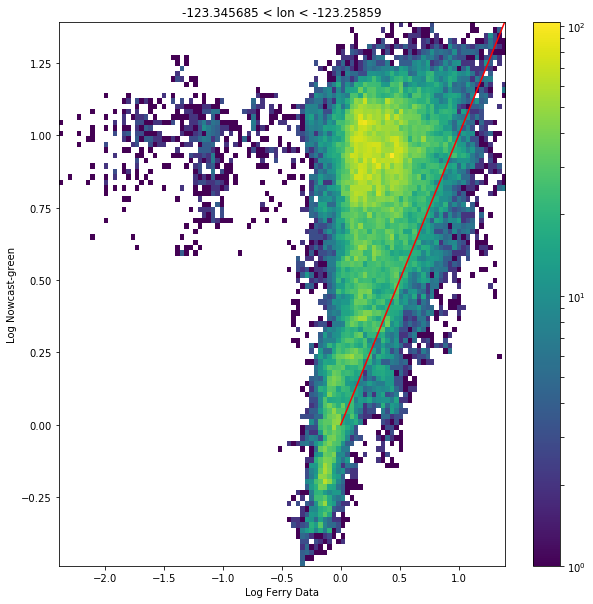

In [21]:
make_plot(7)

bias =  0.44530352423
RMSE = 0.6207527279
Willmott = 0.545006618183


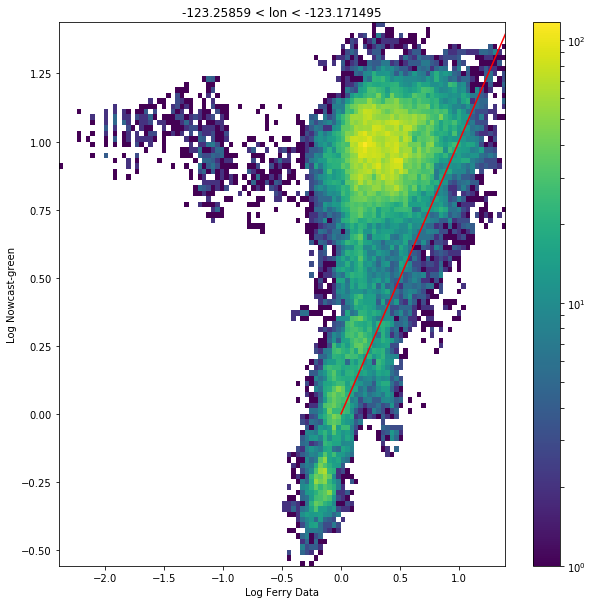

In [22]:
make_plot(8)

bias =  0.411407067239
RMSE = 0.573952107856
Willmott = 0.590795928295


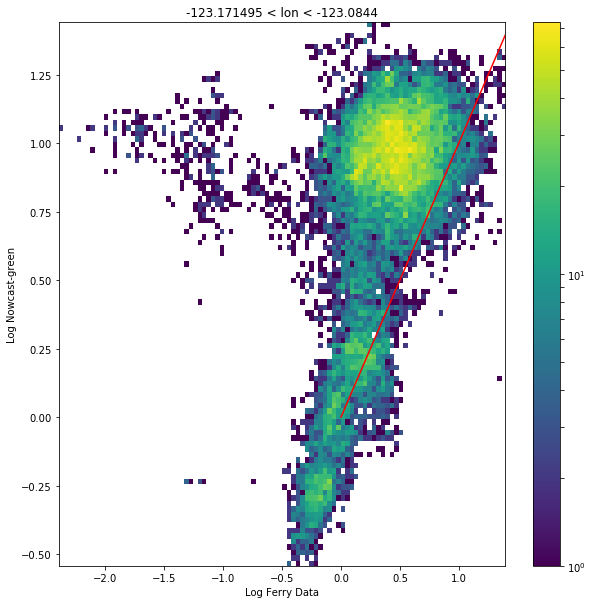

In [23]:
make_plot(9)

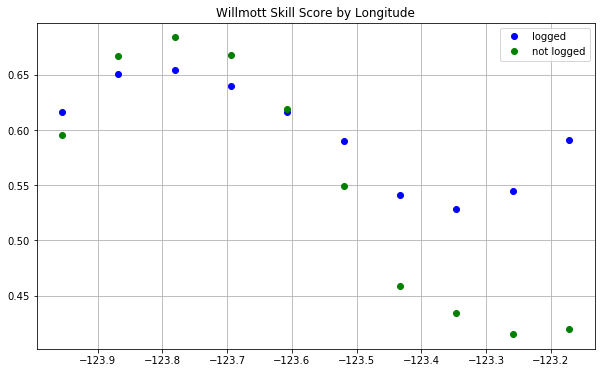

In [32]:
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(bounds[:-1], [0.616661915088,0.650595443438,
                      0.6540904575,0.640065668505,0.616104589368,0.590344294382,
                      0.541351683755,0.528863342517,0.545006618183,0.590795928295], 
        'bo', label = 'logged')
ax.plot(bounds[:-1], [0.595797999013,0.667410325308,0.683796551854,0.66794925301,0.619404431285,
                      0.549347784454,0.45911867192,0.434143272544,0.415214430901,0.419380252416], 
        'go', label = 'not logged')
ax.grid('on')
ax.set_title('Willmott Skill Score by Longitude')
ax.legend();